## Ch08 Neural_Network 機器學習實作
1. (多層感知機 Multilayer perceptron, MLP) 含倒傳遞( Backward propagation)
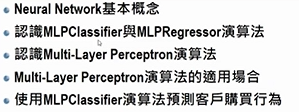
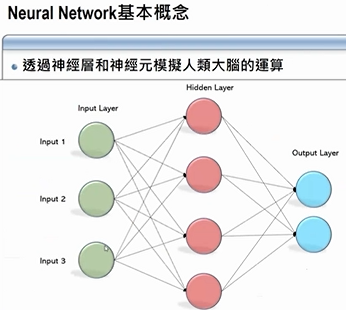
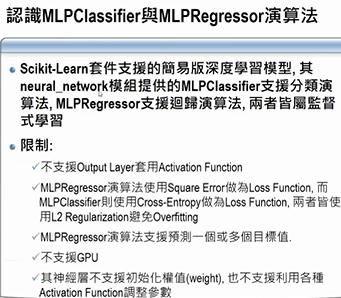
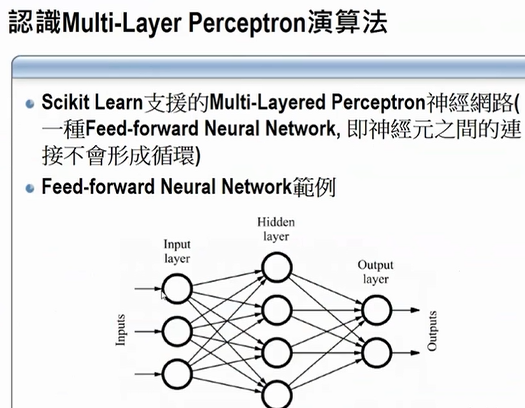
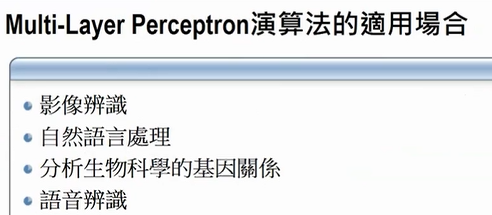
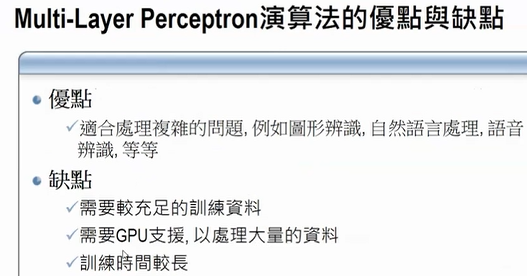
2. 前向傳遞 (Forward propagation)
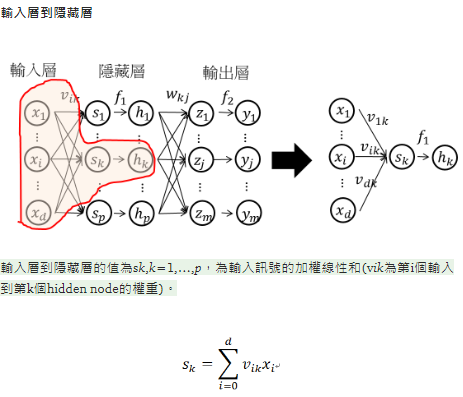
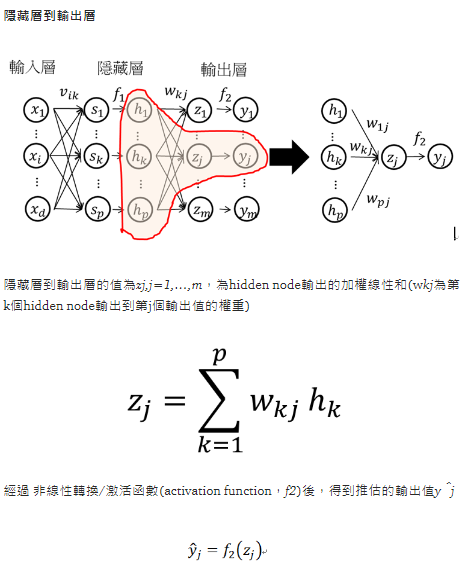
3.反向傳遞 (Backward propagation)<br>
反向傳遞的目的就是利用最後的目標函數(loss/cost function)來進行參數的更新，一般來說都是用誤差均方和(mean square error)當作目標函數。如果誤差值越大，代表參數學得不好，所以需要繼續學習，直到參數或是誤差值收斂。
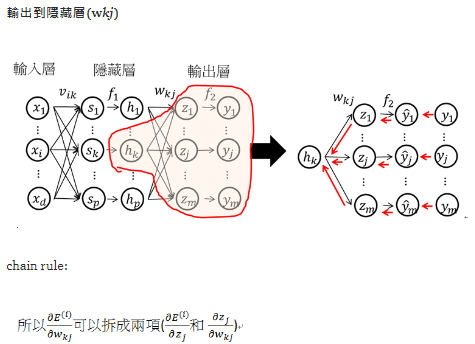
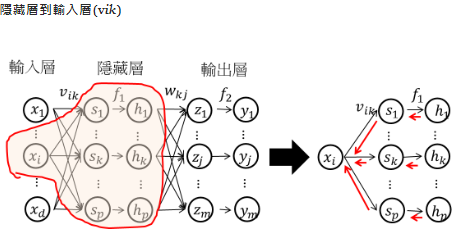
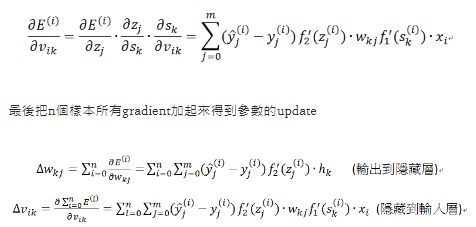
<b>4.結論 : MLP神經網路只是在利用gradient descent找最佳參數解,最後帶入MLP內的前向傳遞 (Forward propagation)即可得到最後的預測值。</b>
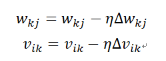

Example: 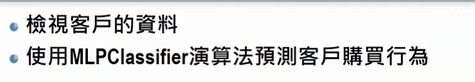

In [5]:
#Multi layer Perceptron (MLP) Models on Real World Banking Data(https://becominghuman.ai/multi-layer-perceptron-mlp-models-on-real-world-banking-data-f6dd3d7e998f)

import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv(r'Datasets\bank.csv', sep=';')
display(df.head())
print(df.info())

df.to_csv("bank.csv")

encodeColumns=["job", "marital", "education", "housing", "loan", "contact", "poutcome", "y"]
df.loc[:, encodeColumns]=df.loc[:, encodeColumns].apply(LabelEncoder().fit_transform)
df=df.drop(['month','default'], axis=1)
df.rename(columns={"y": "subscribed"}, inplace=True)
display(df.head())

X=df.drop('subscribed',axis=1)
Y= df['subscribed']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=101)

scaler = StandardScaler()

# Fit the Training & Test Data 
scaler.fit(X_Train)

X_Train = scaler.transform(X_Train)
X_Test = scaler.transform(X_Test)

model = MLPClassifier(hidden_layer_sizes=(11,8,5), activation="relu", max_iter=1000)
model.fit(X_Train, Y_Train)

predictions =model.predict(X_Test)
print(confusion_matrix(Y_Test, predictions))
print(classification_report(Y_Test, predictions))
print(accuracy_score(Y_Test,predictions))

scores = cross_val_score(model, X, Y, cv=10)
print(scores)
print(scores.mean())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
0,30,10,1,0,1787,0,0,0,19,79,1,-1,0,3,0
1,33,7,1,1,4789,1,1,0,11,220,1,339,4,0,0
2,35,4,2,2,1350,1,0,0,16,185,1,330,1,0,0
3,30,4,1,2,1476,1,1,2,3,199,4,-1,0,3,0
4,59,1,1,1,0,1,0,2,5,226,1,-1,0,3,0


[[756  44]
 [ 72  33]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       800
           1       0.43      0.31      0.36       105

    accuracy                           0.87       905
   macro avg       0.67      0.63      0.65       905
weighted avg       0.86      0.87      0.86       905

0.8718232044198895
[0.88300221 0.87389381 0.87168142 0.87389381 0.88495575 0.8960177
 0.87610619 0.88495575 0.88938053 0.88716814]
0.8821055304850651
